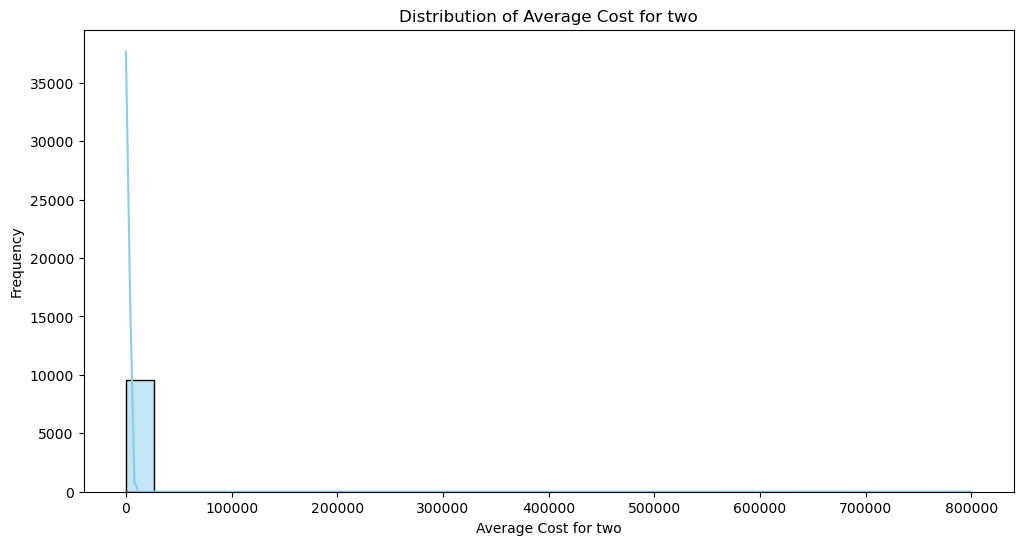

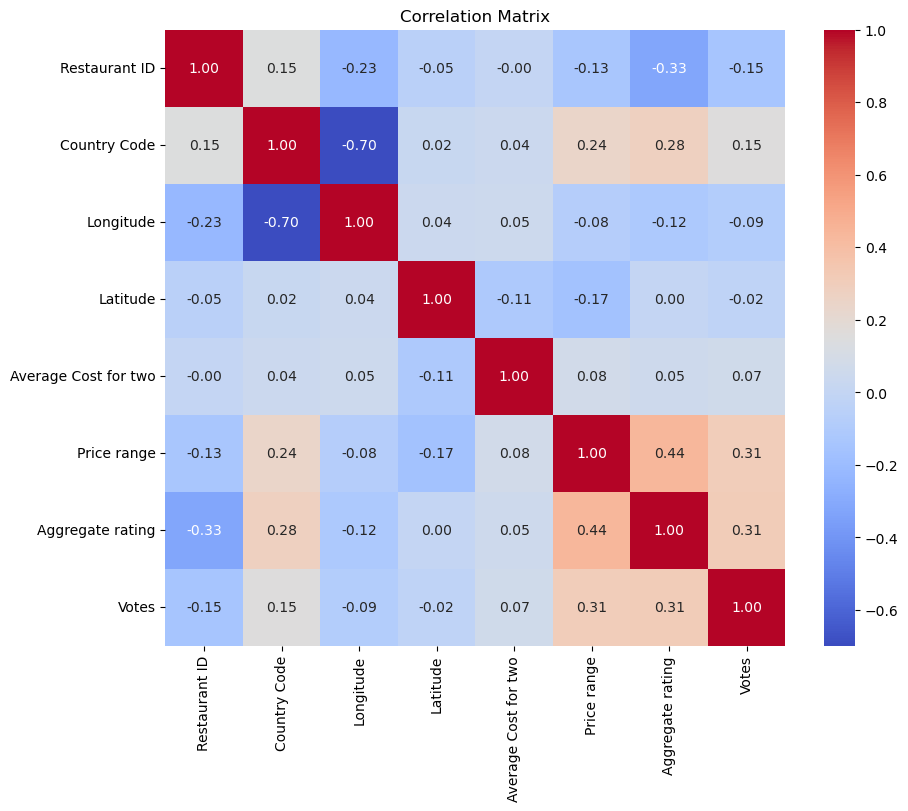

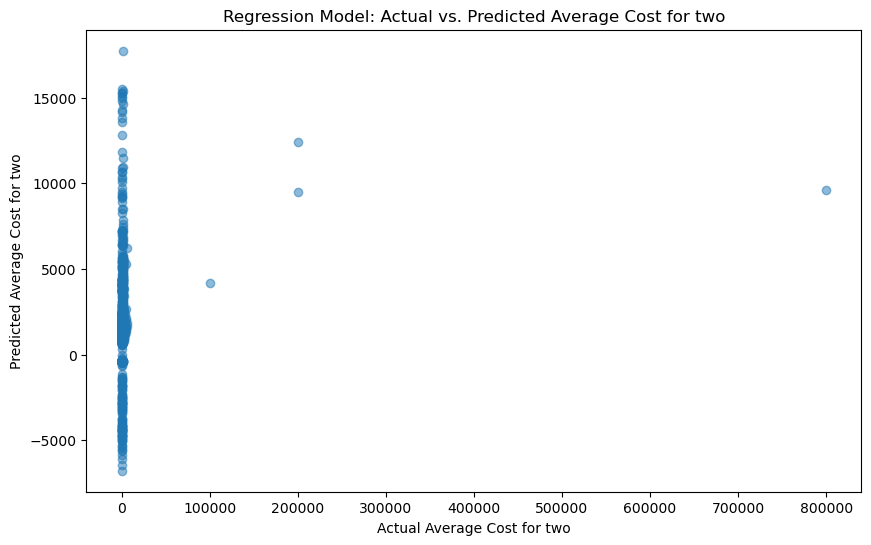

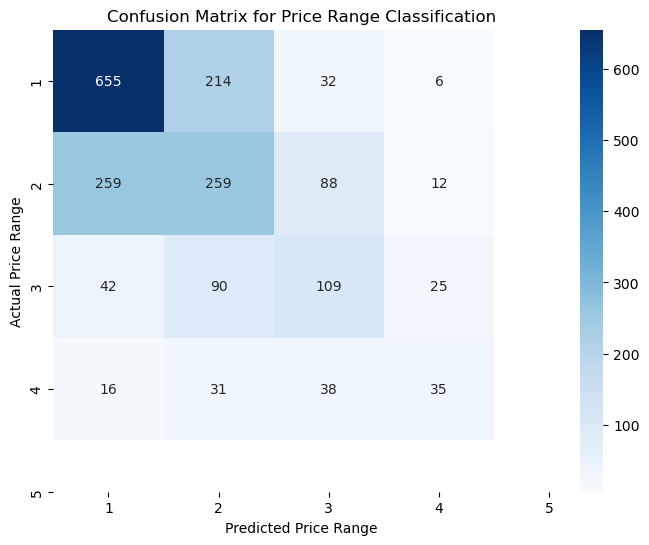

Mean Squared Error for Average Cost for two: 374372845.7440019
Accuracy for Price range prediction: 0.5536368393511251


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

zomato_data_path = "C:\\Users\\sv697\\Downloads\\zomato.csv"
country_code_path = "C:\\Users\\sv697\\Downloads\\Country-Code.xlsx"

zomato_data = pd.read_csv(zomato_data_path, encoding='latin1') 
country_code_data = pd.read_excel(country_code_path)

merged_data = pd.merge(zomato_data, country_code_data, how='left', left_on='Country Code', right_on='Country Code')

merged_data.fillna(0, inplace=True)

X = merged_data[['Longitude', 'Latitude', 'Aggregate rating', 'Votes']]
y_avg_cost_for_two = merged_data['Average Cost for two']
y_price_range = merged_data['Price range']

X_train, X_test, y_avg_cost_for_two_train, y_avg_cost_for_two_test = train_test_split(X, y_avg_cost_for_two, test_size=0.2, random_state=42)
X_train, X_test, y_price_range_train, y_price_range_test = train_test_split(X, y_price_range, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_avg_cost_for_two_train)
avg_cost_for_two_predictions = regression_model.predict(X_test)
avg_cost_for_two_error = mean_squared_error(y_avg_cost_for_two_test, avg_cost_for_two_predictions)

classification_model = RandomForestClassifier()
classification_model.fit(X_train, y_price_range_train)
price_range_predictions = classification_model.predict(X_test)
price_range_accuracy = accuracy_score(y_price_range_test, price_range_predictions)

plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='Average Cost for two', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Cost for two')
plt.xlabel('Average Cost for two')
plt.ylabel('Frequency')
plt.show()

correlation_matrix = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_avg_cost_for_two_test, avg_cost_for_two_predictions, alpha=0.5)
plt.title('Regression Model: Actual vs. Predicted Average Cost for two')
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')
plt.show()

conf_matrix = confusion_matrix(y_price_range_test, price_range_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title('Confusion Matrix for Price Range Classification')
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.show()

print(f'Mean Squared Error for Average Cost for two: {avg_cost_for_two_error}')
print(f'Accuracy for Price range prediction: {price_range_accuracy}')


       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

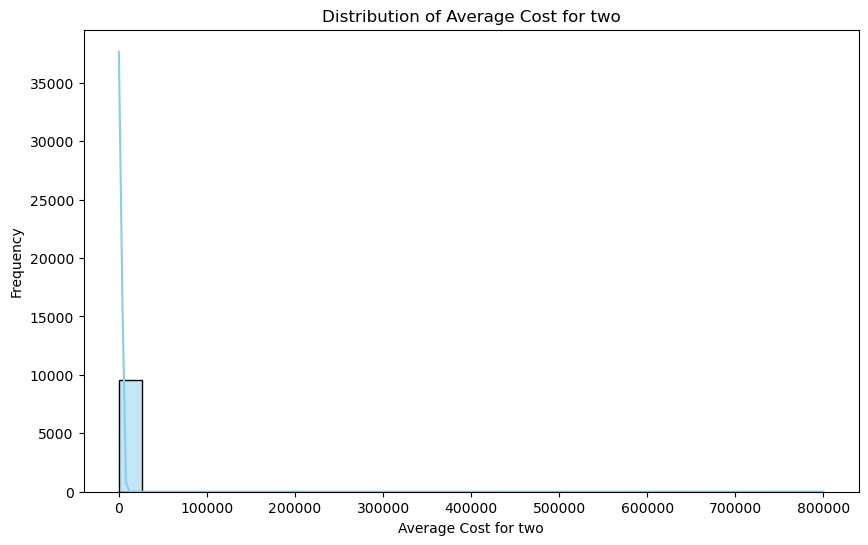

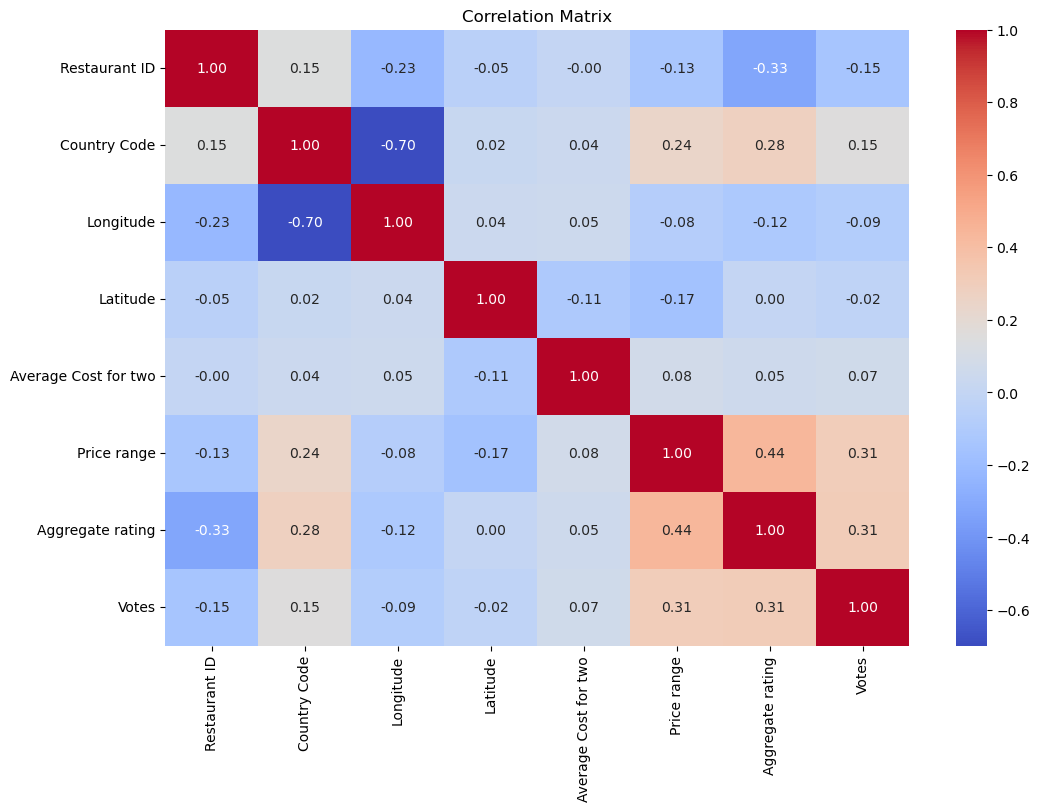

Mean Squared Error for Average Cost for two: 197700854.7640406


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

zomato_data_path = "C:\\Users\\sv697\\Downloads\\zomato.csv"
zomato_data = pd.read_csv(zomato_data_path, encoding='latin1')

print(zomato_data.describe())

plt.figure(figsize=(10, 6))
sns.histplot(zomato_data['Average Cost for two'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Cost for two')
plt.xlabel('Average Cost for two')
plt.ylabel('Frequency')
plt.show()

correlation_matrix = zomato_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Currency']
zomato_data = zomato_data.drop(columns=columns_to_drop)

imputer = SimpleImputer(strategy='mean')
zomato_data[['Longitude', 'Latitude', 'Aggregate rating', 'Votes']] = imputer.fit_transform(zomato_data[['Longitude', 'Latitude', 'Aggregate rating', 'Votes']])

binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
zomato_data[binary_columns] = zomato_data[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

zomato_data = pd.get_dummies(zomato_data, columns=['City', 'Cuisines', 'Rating color', 'Rating text'], drop_first=True)

X = zomato_data.drop(columns=['Average Cost for two', 'Price range'])
y_avg_cost_for_two = zomato_data['Average Cost for two']
y_price_range = zomato_data['Price range']

X_train, X_test, y_avg_cost_for_two_train, y_avg_cost_for_two_test = train_test_split(X, y_avg_cost_for_two, test_size=0.2, random_state=42)
X_train, X_test, y_price_range_train, y_price_range_test = train_test_split(X, y_price_range, test_size=0.2, random_state=42)

regression_model = RandomForestRegressor()
regression_model.fit(X_train, y_avg_cost_for_two_train)
avg_cost_for_two_predictions = regression_model.predict(X_test)
avg_cost_for_two_error = mean_squared_error(y_avg_cost_for_two_test, avg_cost_for_two_predictions)

print(f'Mean Squared Error for Average Cost for two: {avg_cost_for_two_error}')


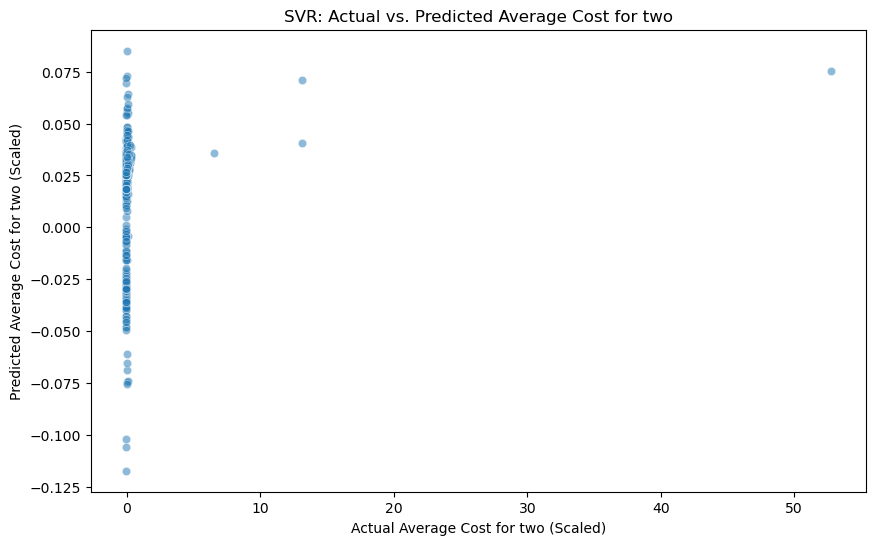

SVR Mean Squared Error for Average Cost for two: 1.657150821481098


In [3]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler_svr = StandardScaler()
y_avg_cost_for_two_train_scaled = scaler_svr.fit_transform(y_avg_cost_for_two_train.values.reshape(-1, 1)).ravel()
y_avg_cost_for_two_test_scaled = scaler_svr.transform(y_avg_cost_for_two_test.values.reshape(-1, 1)).ravel()

svr_model = SVR()
svr_model.fit(X_train, y_avg_cost_for_two_train_scaled)

avg_cost_for_two_predictions_svr = svr_model.predict(X_test)
mse_avg_cost_for_two_svr = mean_squared_error(y_avg_cost_for_two_test_scaled, avg_cost_for_two_predictions_svr)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_avg_cost_for_two_test_scaled, y=avg_cost_for_two_predictions_svr, alpha=0.5)
plt.title('SVR: Actual vs. Predicted Average Cost for two')
plt.xlabel('Actual Average Cost for two (Scaled)')
plt.ylabel('Predicted Average Cost for two (Scaled)')
plt.show()

print(f'SVR Mean Squared Error for Average Cost for two: {mse_avg_cost_for_two_svr}')


Mean Squared Error for Average Cost for two: 210678375.5831422
Mean Squared Error for Price range: 0.31290728089119835


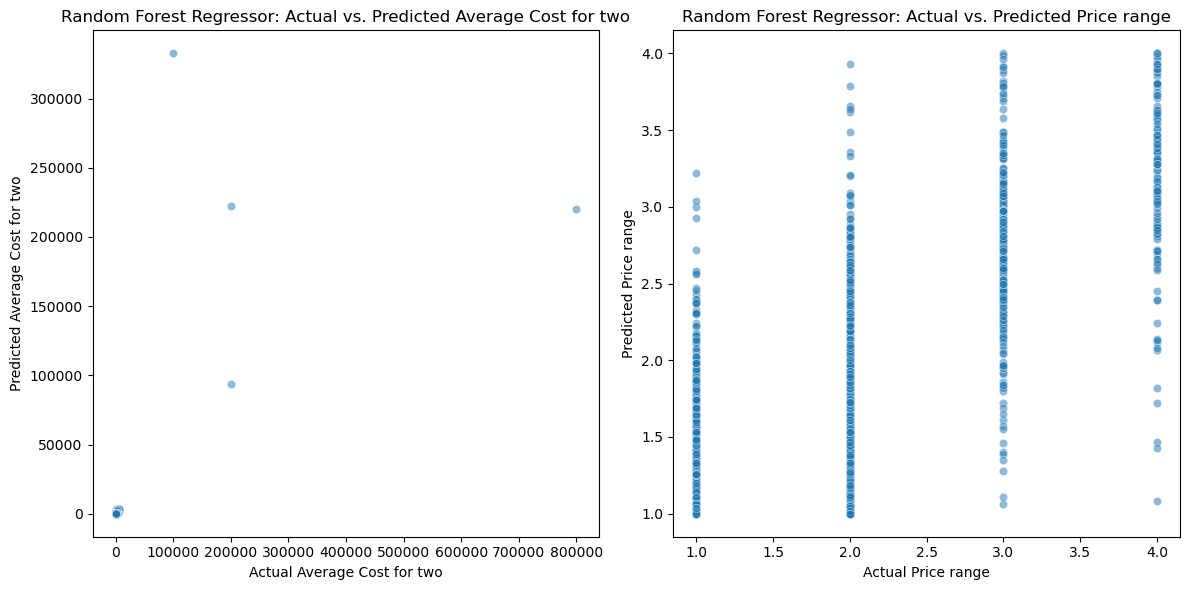

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

zomato_data_path = "C:\\Users\\sv697\\Downloads\\zomato.csv"
zomato_data = pd.read_csv(zomato_data_path, encoding='latin1')

columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Currency']
zomato_data = zomato_data.drop(columns=columns_to_drop)

imputer = SimpleImputer(strategy='mean')
zomato_data[['Longitude', 'Latitude', 'Aggregate rating', 'Votes']] = imputer.fit_transform(zomato_data[['Longitude', 'Latitude', 'Aggregate rating', 'Votes']])

binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
zomato_data[binary_columns] = zomato_data[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

zomato_data = pd.get_dummies(zomato_data, columns=['City', 'Cuisines', 'Rating color', 'Rating text'], drop_first=True)

X = zomato_data.drop(columns=['Average Cost for two', 'Price range'])
y_targets = zomato_data[['Average Cost for two', 'Price range']]

X_train, X_test, y_train, y_test = train_test_split(X, y_targets, test_size=0.2, random_state=42)

regression_model = RandomForestRegressor()

multioutput_regressor = MultiOutputRegressor(regression_model)
multioutput_regressor.fit(X_train, y_train)

predictions = multioutput_regressor.predict(X_test)

mse_avg_cost_for_two = mean_squared_error(y_test['Average Cost for two'], predictions[:, 0])
mse_price_range = mean_squared_error(y_test['Price range'], predictions[:, 1])

print(f'Mean Squared Error for Average Cost for two: {mse_avg_cost_for_two}')
print(f'Mean Squared Error for Price range: {mse_price_range}')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test['Average Cost for two'], y=predictions[:, 0], alpha=0.5)
plt.title('Random Forest Regressor: Actual vs. Predicted Average Cost for two')
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test['Price range'], y=predictions[:, 1], alpha=0.5)
plt.title('Random Forest Regressor: Actual vs. Predicted Price range')
plt.xlabel('Actual Price range')
plt.ylabel('Predicted Price range')

plt.tight_layout()
plt.show()


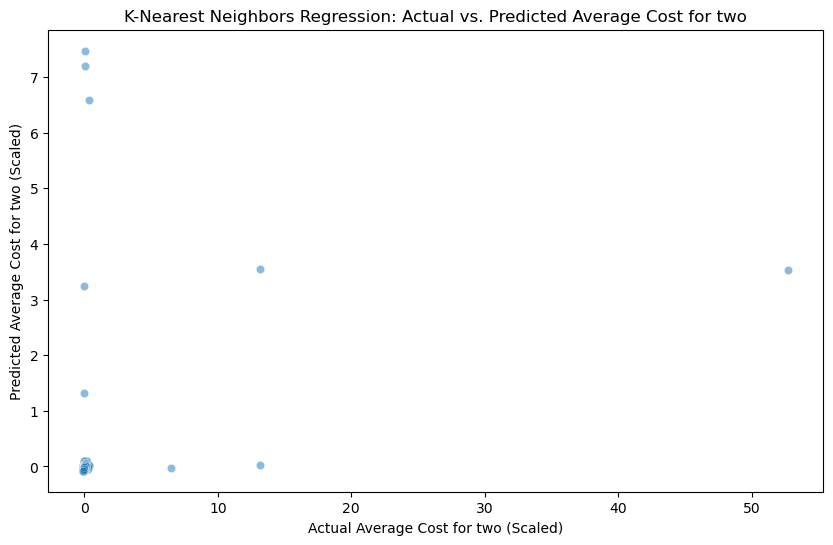

KNN Regression Mean Squared Error for Average Cost for two: 1.5107379134425452


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler_knn = StandardScaler()
y_avg_cost_for_two_train_scaled_knn = scaler_knn.fit_transform(y_avg_cost_for_two_train.values.reshape(-1, 1)).ravel()
y_avg_cost_for_two_test_scaled_knn = scaler_knn.transform(y_avg_cost_for_two_test.values.reshape(-1, 1)).ravel()

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_avg_cost_for_two_train_scaled_knn)

avg_cost_for_two_predictions_knn = knn_regressor.predict(X_test)
mse_avg_cost_for_two_knn = mean_squared_error(y_avg_cost_for_two_test_scaled_knn, avg_cost_for_two_predictions_knn)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_avg_cost_for_two_test_scaled_knn, y=avg_cost_for_two_predictions_knn, alpha=0.5)
plt.title('K-Nearest Neighbors Regression: Actual vs. Predicted Average Cost for two')
plt.xlabel('Actual Average Cost for two (Scaled)')
plt.ylabel('Predicted Average Cost for two (Scaled)')
plt.show()

print(f'KNN Regression Mean Squared Error for Average Cost for two: {mse_avg_cost_for_two_knn}')


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


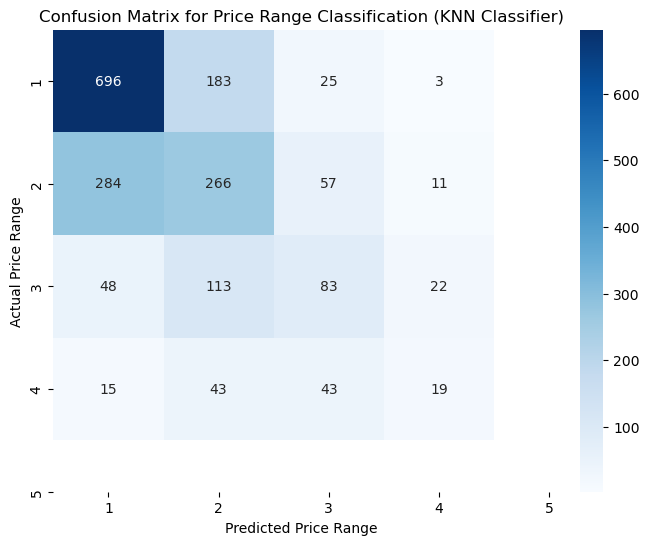

KNN Classifier Accuracy for Price range: 0.5567765567765568


In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_price_range_train)

price_range_predictions_knn = knn_classifier.predict(X_test)
accuracy_price_range_knn = accuracy_score(y_price_range_test, price_range_predictions_knn)

conf_matrix_price_range_knn = confusion_matrix(y_price_range_test, price_range_predictions_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_price_range_knn, annot=True, fmt="d", cmap='Blues', xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title('Confusion Matrix for Price Range Classification (KNN Classifier)')
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.show()

print(f'KNN Classifier Accuracy for Price range: {accuracy_price_range_knn}')


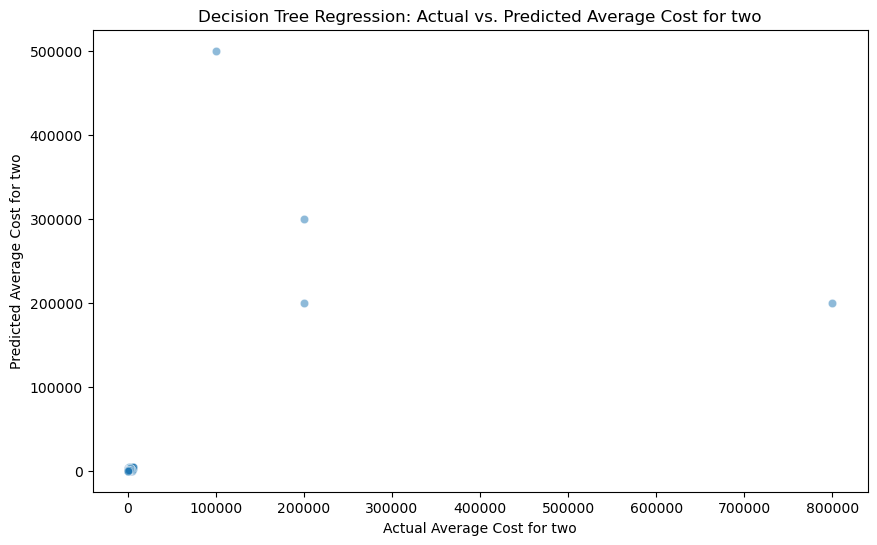

Decision Tree Regression Mean Squared Error for Average Cost for two: 277544427.8497623


In [8]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_avg_cost_for_two_train)

avg_cost_for_two_predictions_tree = decision_tree_regressor.predict(X_test)
mse_avg_cost_for_two_tree = mean_squared_error(y_avg_cost_for_two_test, avg_cost_for_two_predictions_tree)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_avg_cost_for_two_test, y=avg_cost_for_two_predictions_tree, alpha=0.5)
plt.title('Decision Tree Regression: Actual vs. Predicted Average Cost for two')
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')
plt.show()

print(f'Decision Tree Regression Mean Squared Error for Average Cost for two: {mse_avg_cost_for_two_tree}')


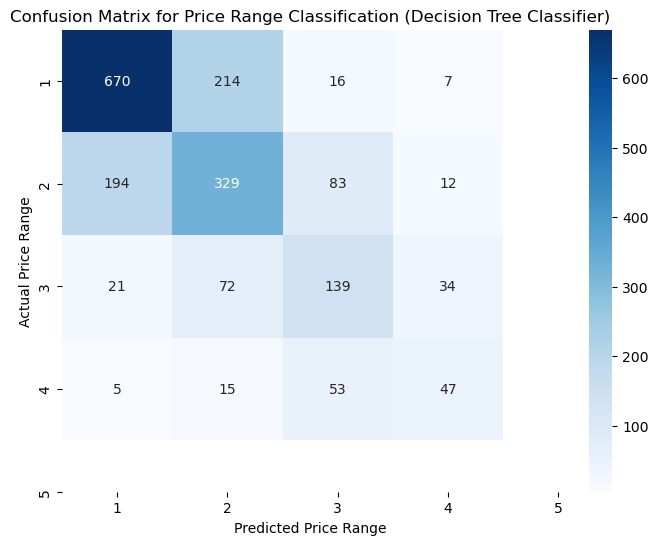

Decision Tree Classifier Accuracy for Price range: 0.6200941915227629


In [9]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_price_range_train)

price_range_predictions_tree = decision_tree_classifier.predict(X_test)
accuracy_price_range_tree = accuracy_score(y_price_range_test, price_range_predictions_tree)

conf_matrix_price_range_tree = confusion_matrix(y_price_range_test, price_range_predictions_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_price_range_tree, annot=True, fmt="d", cmap='Blues', xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title('Confusion Matrix for Price Range Classification (Decision Tree Classifier)')
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.show()

print(f'Decision Tree Classifier Accuracy for Price range: {accuracy_price_range_tree}')


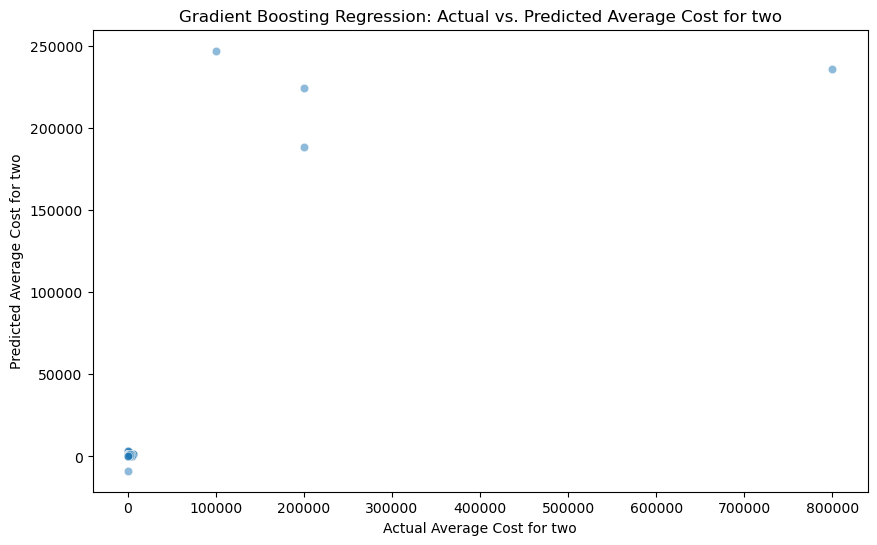

Gradient Boosting Regression Mean Squared Error for Average Cost for two: 178312504.59542033


In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_regressor = GradientBoostingRegressor()
gradient_boosting_regressor.fit(X_train, y_avg_cost_for_two_train)

avg_cost_for_two_predictions_gb = gradient_boosting_regressor.predict(X_test)
mse_avg_cost_for_two_gb = mean_squared_error(y_avg_cost_for_two_test, avg_cost_for_two_predictions_gb)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_avg_cost_for_two_test, y=avg_cost_for_two_predictions_gb, alpha=0.5)
plt.title('Gradient Boosting Regression: Actual vs. Predicted Average Cost for two')
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')
plt.show()

print(f'Gradient Boosting Regression Mean Squared Error for Average Cost for two: {mse_avg_cost_for_two_gb}')


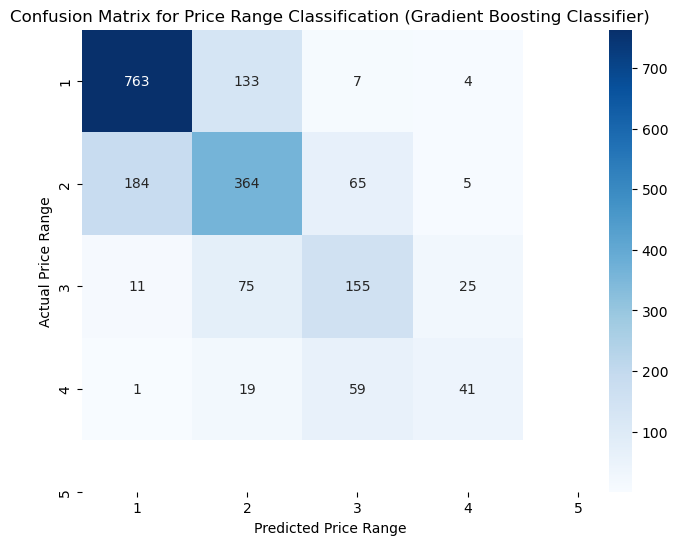

Gradient Boosting Classifier Accuracy for Price range: 0.6923076923076923


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, y_price_range_train)

price_range_predictions_gb = gradient_boosting_classifier.predict(X_test)
accuracy_price_range_gb = accuracy_score(y_price_range_test, price_range_predictions_gb)

conf_matrix_price_range_gb = confusion_matrix(y_price_range_test, price_range_predictions_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_price_range_gb, annot=True, fmt="d", cmap='Blues', xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.title('Confusion Matrix for Price Range Classification (Gradient Boosting Classifier)')
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.show()

print(f'Gradient Boosting Classifier Accuracy for Price range: {accuracy_price_range_gb}')


In [12]:
from sklearn.model_selection import cross_val_score

cross_val_scores_rf = cross_val_score(regression_model, X, y_avg_cost_for_two, cv=5, scoring='neg_mean_squared_error')
mse_cv_rf = -cross_val_scores_rf.mean()

print(f'Cross-Validation Mean Squared Error for Random Forest Regression: {mse_cv_rf}')


Cross-Validation Mean Squared Error for Random Forest Regression: 260702344.09078336


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_parameters = {'C': [1, 10, 100], 'epsilon': [0.1, 0.2, 0.5]}
grid_search_svr = GridSearchCV(SVR(), svr_parameters, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X, y_avg_cost_for_two)

best_svr_model = grid_search_svr.best_estimator_

cross_val_scores_svr = cross_val_score(best_svr_model, X, y_avg_cost_for_two, cv=5, scoring='neg_mean_squared_error')
mse_cv_svr = -cross_val_scores_svr.mean()

print(f'Cross-Validation Mean Squared Error for SVR: {mse_cv_svr}')


In [ ]:
from sklearn.metrics import classification_report

cross_val_accuracy_rf = cross_val_score(classification_model, X, y_price_range, cv=5, scoring='accuracy')
accuracy_cv_rf = cross_val_accuracy_rf.mean()

print(f'Cross-Validation Accuracy for Random Forest Classifier: {accuracy_cv_rf}')

classification_report_rf = classification_report(y_price_range_test, price_range_predictions)
print("Classification Report for Random Forest Classifier:\n", classification_report_rf)


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores_knn = cross_val_score(knn_regressor, X, y_avg_cost_for_two, cv=5, scoring='neg_mean_squared_error')
mse_cv_knn = -cross_val_scores_knn.mean()

print(f'Cross-Validation Mean Squared Error for KNN Regression: {mse_cv_knn}')


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_accuracy_tree = cross_val_score(decision_tree_classifier, X, y_price_range, cv=5, scoring='accuracy')
accuracy_cv_tree = cross_val_accuracy_tree.mean()

print(f'Cross-Validation Accuracy for Decision Tree Classifier: {accuracy_cv_tree}')


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

cross_val_scores_gb = cross_val_score(gradient_boosting_regressor, X, y_avg_cost_for_two, cv=5, scoring='neg_mean_squared_error')
mse_cv_gb = -cross_val_scores_gb.mean()

print(f'Cross-Validation Mean Squared Error for Gradient Boosting Regression: {mse_cv_gb}')


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

cross_val_accuracy_gb = cross_val_score(gradient_boosting_classifier, X, y_price_range, cv=5, scoring='accuracy')
accuracy_cv_gb = cross_val_accuracy_gb.mean()

print(f'Cross-Validation Accuracy for Gradient Boosting Classifier: {accuracy_cv_gb}')


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_avg_cost_for_two_train)

best_rf_model = grid_search_rf.best_estimator_

mse_rf_tuned = mean_squared_error(y_avg_cost_for_two_test, best_rf_model.predict(X_test))

print(f'Tuned Random Forest Regression Mean Squared Error for Average Cost for two: {mse_rf_tuned}')


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_avg_cost_for_two_train)

best_gb_model = grid_search_gb.best_estimator_

mse_gb_tuned = mean_squared_error(y_avg_cost_for_two_test, best_gb_model.predict(X_test))

print(f'Tuned Gradient Boosting Regression Mean Squared Error for Average Cost for two: {mse_gb_tuned}')


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_gb_classifier = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb_classifier = GridSearchCV(GradientBoostingClassifier(), param_grid_gb_classifier, cv=5, scoring='accuracy')
grid_search_gb_classifier.fit(X_train, y_price_range_train)

best_gb_classifier_model = grid_search_gb_classifier.best_estimator_

accuracy_gb_classifier_tuned = accuracy_score(y_price_range_test, best_gb_classifier_model.predict(X_test))

print(f'Tuned Gradient Boosting Classifier Accuracy for Price range: {accuracy_gb_classifier_tuned}')


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_avg_cost_for_two_train_scaled_knn)

best_knn_model = grid_search_knn.best_estimator_

mse_knn_tuned = mean_squared_error(y_avg_cost_for_two_test_scaled_knn, best_knn_model.predict(X_test))

print(f'Tuned KNN Regression Mean Squared Error for Average Cost for two: {mse_knn_tuned}')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X = df.drop(['Average Cost for two'], axis=1)
y = df['Average Cost for two']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_

mse_rf_tuned = mean_squared_error(y_test, best_rf_model.predict(X_test))

print(f'Tuned Random Forest Regression Mean Squared Error for Average Cost for two: {mse_rf_tuned}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=best_rf_model.predict(X_test), alpha=0.5)
plt.title('Tuned Random Forest Regression: Actual vs. Predicted Average Cost for two')
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(['Average Cost for two'], axis=1)
y = df['Average Cost for two']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

best_gb_model = grid_search_gb.best_estimator_

mse_rf_tuned = mean_squared_error(y_test, best_rf_model.predict(X_test))
mse_gb_tuned = mean_squared_error(y_test, best_gb_model.predict(X_test))

print(f'Tuned Random Forest Regression Mean Squared Error for Average Cost for two: {mse_rf_tuned}')
print(f'Tuned Gradient Boosting Regression Mean Squared Error for Average Cost for two: {mse_gb_tuned}')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=best_rf_model.predict(X_test), alpha=0.5)
plt.title('Tuned Random Forest Regression: Actual vs. Predicted')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=best_gb_model.predict(X_test), alpha=0.5)
plt.title('Tuned Gradient Boosting Regression: Actual vs. Predicted')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.externals import joblib

joblib.dump(best_rf_model, 'best_model_rf_production.pkl')

print('Best Random Forest Regression model saved for production.')


In [ ]:

print(f'Tuned Random Forest Regression Mean Squared Error for Average Cost for two: {mse_rf_tuned}')
print(f'Tuned Gradient Boosting Regression Mean Squared Error for Average Cost for two: {mse_gb_tuned}')

best_model = best_rf_model if mse_rf_tuned < mse_gb_tuned else best_gb_model
best_model_name = 'Random Forest Regression' if mse_rf_tuned < mse_gb_tuned else 'Gradient Boosting Regression'

print(f'\nThe best model selected for production is {best_model_name}.\n')

joblib.dump(best_model, 'best_model_production.pkl')

print(f'Best {best_model_name} model saved for production.')
